In [2]:
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(reshape2)
library(corrplot)

In [4]:
df <- read_csv('../../data/diabetes_012_health_indicators_BRFSS2015.csv')
head(df)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


In [4]:
str(df)

spc_tbl_ [253,680 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Diabetes_012        : num [1:253680] 0 0 0 0 0 0 0 0 2 0 ...
 $ HighBP              : num [1:253680] 1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : num [1:253680] 1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : num [1:253680] 1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num [1:253680] 40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : num [1:253680] 1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : num [1:253680] 0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num [1:253680] 0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : num [1:253680] 0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : num [1:253680] 0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : num [1:253680] 1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : num [1:253680] 0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num [1:253680] 1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num [1:253680] 0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : num [

In [50]:
# check for missing values
sum(is.na(df))

[1] 0

dữ liệu không có NaN

In [7]:
# Check for duplicated rows
sum(duplicated(df))

[1] 23899

dữ liệu có ~24000 dòng bị trùng nhau, chiếm khoảng 9.5% dữ liệu gốc     
tuy nhiên dữ liệu không có id cho mỗi observation nên có thể xem mỗi observation là 1 cá thể riêng biệt và có thể có dữ liệu về tình trạng sức khỏe giống nhau. => có thể không cần thực hiện xóa dữ liệu trùng lặp

In [9]:
# Count unique values in each column
print(sapply(df, n_distinct))

        Diabetes_012               HighBP             HighChol 
                   3                    2                    2 
           CholCheck                  BMI               Smoker 
                   2                   84                    2 
              Stroke HeartDiseaseorAttack         PhysActivity 
                   2                    2                    2 
              Fruits              Veggies    HvyAlcoholConsump 
                   2                    2                    2 
       AnyHealthcare          NoDocbcCost              GenHlth 
                   2                    2                    5 
            MentHlth             PhysHlth             DiffWalk 
                  31                   31                    2 
                 Sex                  Age            Education 
                   2                   13                    6 
              Income 
                   8 


hầu hết các biến trong dataset là biến nhị phân -> biến định tính       
các biến định tính không phải nhị phân bao gồm: Diabetes_012, GenHlth, Age, Education, Income       
các biến định lượng:  
- rời rạc: MentHlth, PhysHlth
- liên tục: BMI (trong dataset này thì được biểu diễn rời rạc)

### Phân phối của các biến

#### Biến định lượng

Vẽ biểu đồ phân phối và boxplot. 

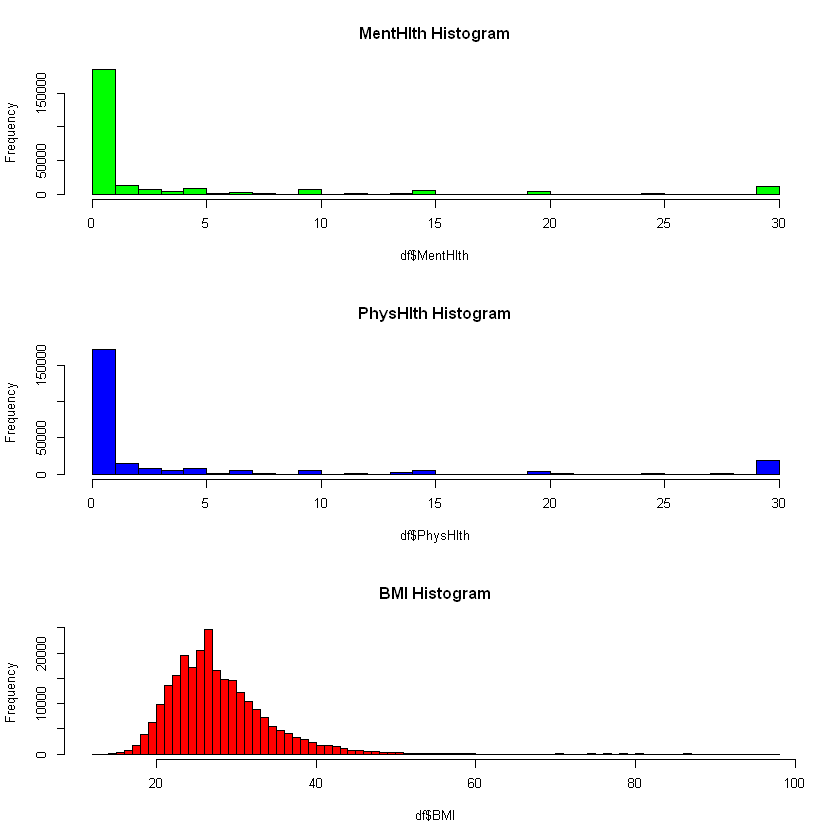

In [11]:
# Plot histograms for quantitative variables
par(mfrow=c(3,1), bg='white')
hist(df$MentHlth, breaks=31, col='green', main='MentHlth Histogram')
hist(df$PhysHlth, breaks=31, col='blue', main='PhysHlth Histogram')
hist(df$BMI, breaks=84, col='red', main='BMI Histogram')

MentHlth và PhysHlth chứa nhiều giá trị 0: phần lớn mọi người không có vấn đề về sức khỏe tinh thần và thể chất. Điều này cũng khá phù hợp với thực tế       
Histogram cho 2 biến này đương tối tương đồng -> có thể có tương quan/ đa cộng tuyến giữa 2 biến này.       

Phân phối của cả 3 biến đang bị lệch phải. 

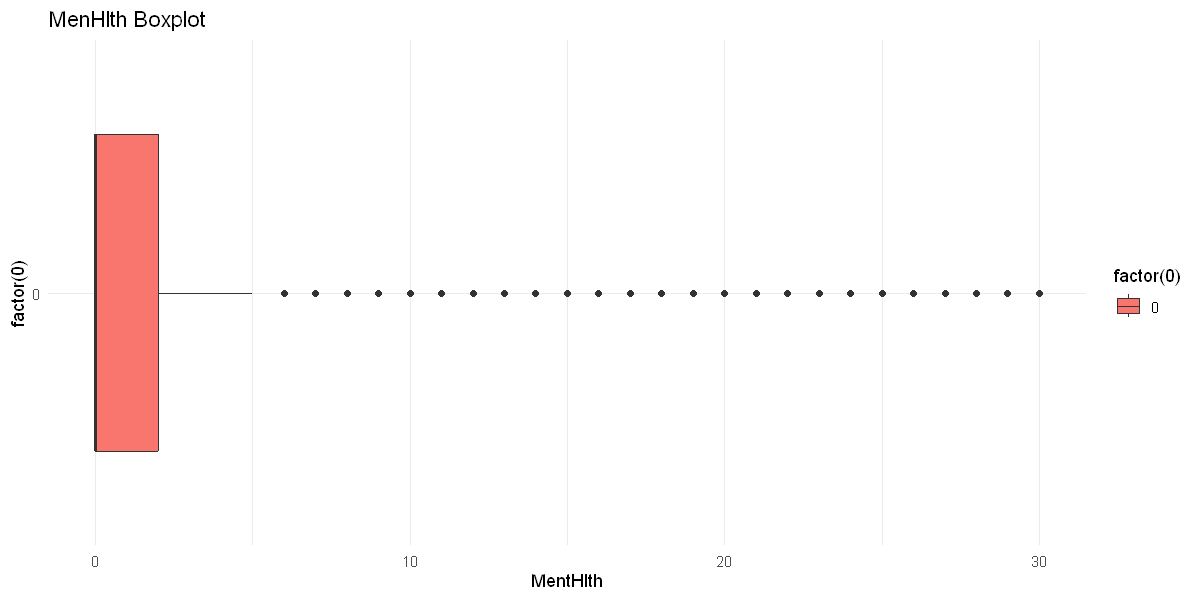

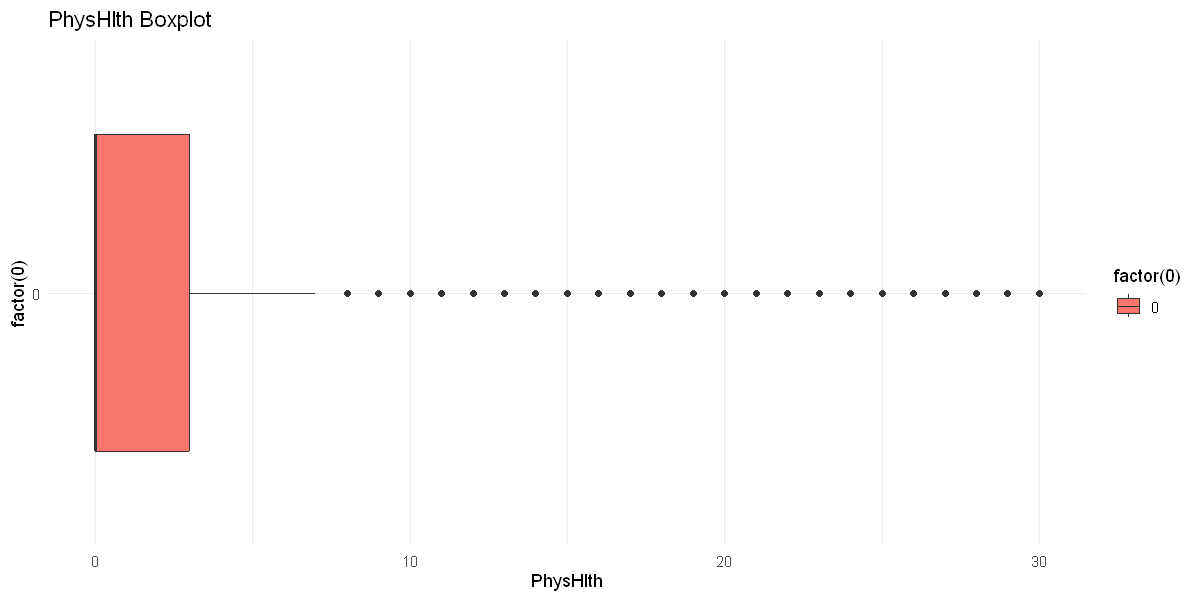

In [5]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(df, aes(x = factor(0), y = MentHlth, fill= factor(0))) + 
    geom_boxplot() + 
    labs(title = "MenHlth Boxplot") + 
    theme_minimal() + 
    coord_flip()

ggplot(df, aes(x = factor(0), y = PhysHlth, fill= factor(0))) + 
    geom_boxplot() + 
    labs(title = "PhysHlth Boxplot") + 
    theme_minimal() + 
    coord_flip()

đa phần quan sát gặp vấn đề về tinh thần và thể chất kéo dài < 10 ngày. Số ít (outlier) kéo dài >= 10 ngày.

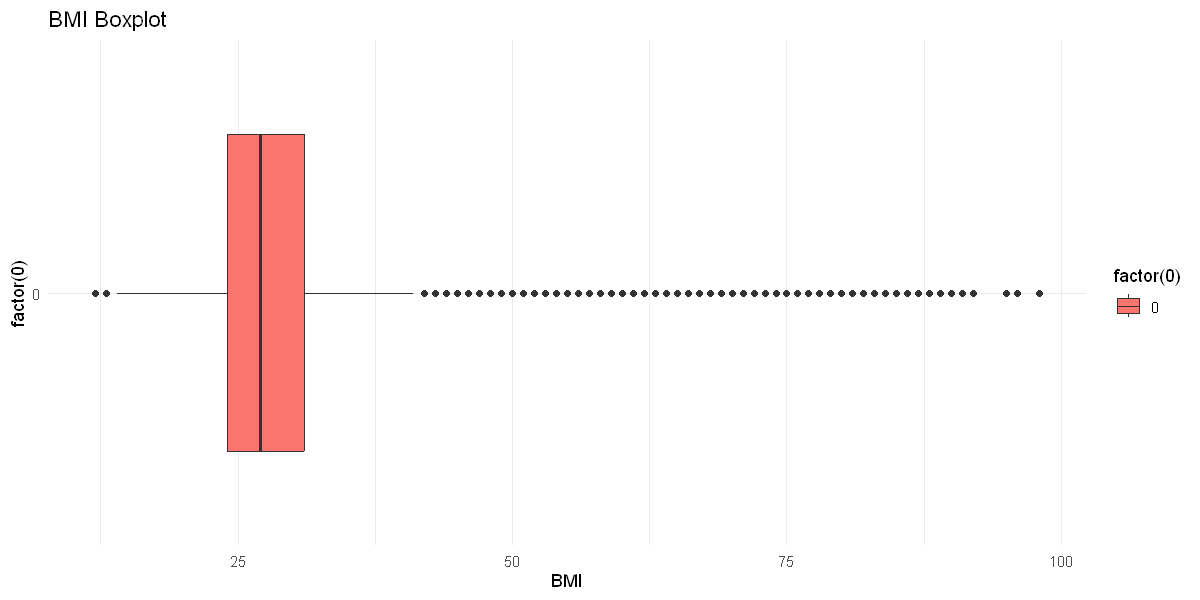

In [25]:
ggplot(df, aes(x = factor(0), y = BMI, fill= factor(0))) + 
    geom_boxplot() + 
    labs(title = "BMI Boxplot") + 
    theme_minimal() + 
    coord_flip()

In [14]:
# summary for BMI
summary(df$BMI)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

thông qua boxplot và bảng summary thì ta thấy rõ hơn được phân bố của BMI tập trung chủ yếu vào khoảng [24,31] với trung bình là 28 độ lệch là 6, và có nhiều outlier có BMI lớn.

**Tính tỉ lệ outliers:**

In [5]:
percent_outliers <- function(x) {
  sum(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x)) / length(x) * 100
}

print(percent_outliers(df$BMI))
print(percent_outliers(df$MentHlth))
print(percent_outliers(df$PhysHlth))

[1] 3.881662
[1] 14.2731
[1] 16.14199


#### Biến định tính

Vẽ biểu đồ tần số.

No id variables; using all as measure variables



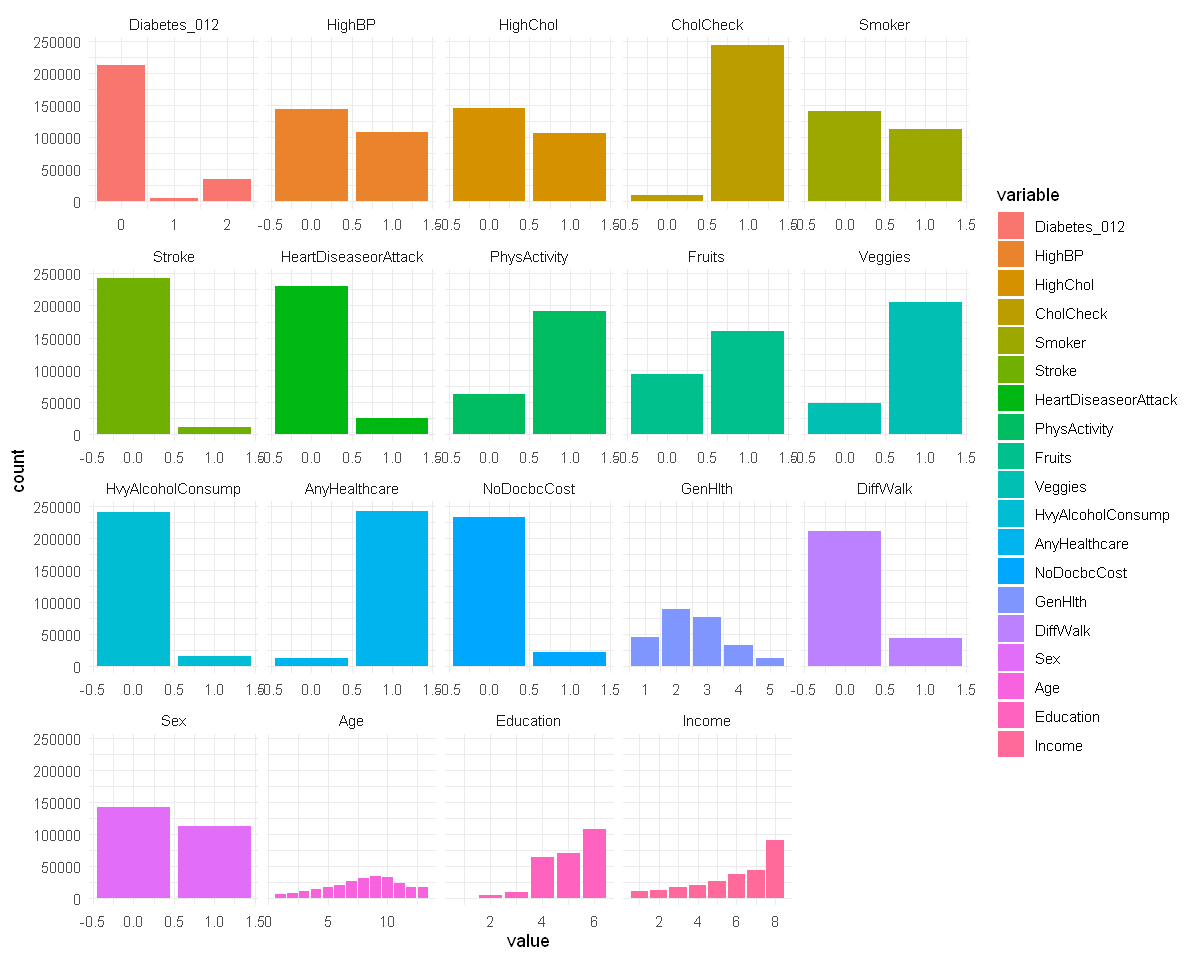

In [6]:
df2 <- df %>% select(-BMI, -MentHlth, -PhysHlth)
df2_melt <- melt(df2)

options(repr.plot.width=10, repr.plot.height=8)

ggplot(df2_melt, aes(x = value, fill = variable)) + 
    geom_bar() + 
    facet_wrap(~variable, scales = 'free_x') + 
    theme_minimal()

dữ liệu cân bằng ở các biến (xấp xỉ 40-50%): HighBP, HighChol, Smoker, Sex.     
trên thực tế thì khả năng khảo sát được kết quả này là bình thường          
tỉ lệ sex cân bằng cũng cho thấy dữ liệu khảo sát đều trên cả 2 giới tính

**Dữ liệu mất cân bằng trong biến dự đoán Diabetes_012, cụ thể là tỉ lệ người không bị tiểu đường nhiều >> tỉ lệ người bị tiểu đường và tiền tiểu đường**

Kiểm tra tỉ lệ cho biến dự đoán tiểu đường:

In [62]:
# tỉ lệ phần trăm của biến Diabetes_012
tm <- table(
    df$Diabetes_012,
    useNA = 'ifany'
)
prop.table(tm)


         0          1          2 
0.84241170 0.01825528 0.13933302 

Ở đây tỉ lệ trong nhóm 0 (Không bị tiểu đường) chiếm đến 84%, trong khi nhóm 1 chiếm chưa tới 2%.       
=> **Dữ liệu bị mất cân bằng nặng.** 

Các biến khác:
- Đa số các quan sát đã kiểm tra cholesterol trong 5 năm, chỉ một số ít chưa kiểm tra.
- Số lượng quan sát từng bị đột quỵ hoặc bị nhồi máu cơ tim thấp.
- Đa số quan sát có hoạt động thể chất trong vòng 30 ngày gần đây, khoảng hơn 1/5 quan sát là không.
- Số người ăn trái cây ít nhất một ngày gần gấp đôi số người không.
- Đa số các quan sát ăn rau củ quả mỗi ngày, chiếm hơn 4/5 toàn bộ quan sát.
- Đa số các quan sát không uống nhiều rượu.
- Đa số các quan sát đã tiếp cận các dịch vụ sức khỏe.
- Một số ít quan sát (khoảng dưới 50.000) không gặp bác sĩ trong vòng 12 tháng vì không có kinh phí.
- Đa số các tình trạng sức khỏe chung của quan sát đều ở mức Very Good (nhãn 2) và Good (nhãn 3).
- Có khoảng gần 50.000 quan sát gặp tình trạng khó khăn trong đi lại.
- Trình độ học vấn quan sát được trong mẫu ở mức 4,5,6 nhiều (6 là cao nhất) => **cân nhắc gộp nhãn hiếm (1,2,3)** 
- Thu nhập ở mức 8 (cao nhất) cũng có số lượng cao nhất và giảm dần ở các mức còn lại. 

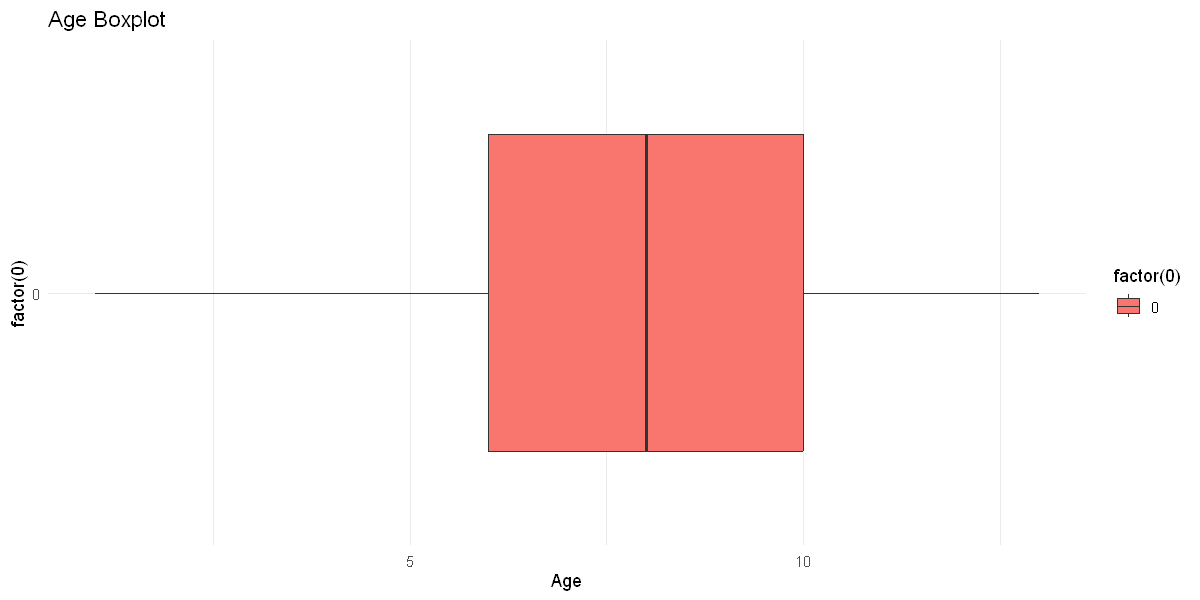

In [24]:
options(repr.plot.width=10, repr.plot.height=5)

ggplot(df, aes(x = factor(0), y = Age, fill = factor(0))) + 
  geom_boxplot() + 
  labs(title = "Age Boxplot") + 
  theme_minimal() +
  coord_flip()

phần lớn các quan sát nằm trong **nhóm** tuổi từ 6-10, với nhóm 1 có độ tuổi từ 18-24, nhóm 2 từ 25-29, nhóm 3 từ 30-34,... thì mẫu này chứa nhiều quan sát trong nhóm tuổi từ 45-69.

**Tổng quan**: Đa số các quan trắc trong dataset này nằm trong độ tuổi trung niên, có thu nhập khá tốt và cũng có lối sống lành mạnh. Qua đó cũng quan sát thấy số lượng các quan trắc không bị bệnh tiểu đường cũng chiếm đa số. 

Các yếu tố được quan sát và khả năng mắc bệnh tiểu đường có thể liên quan với nhau. 

### Correlation

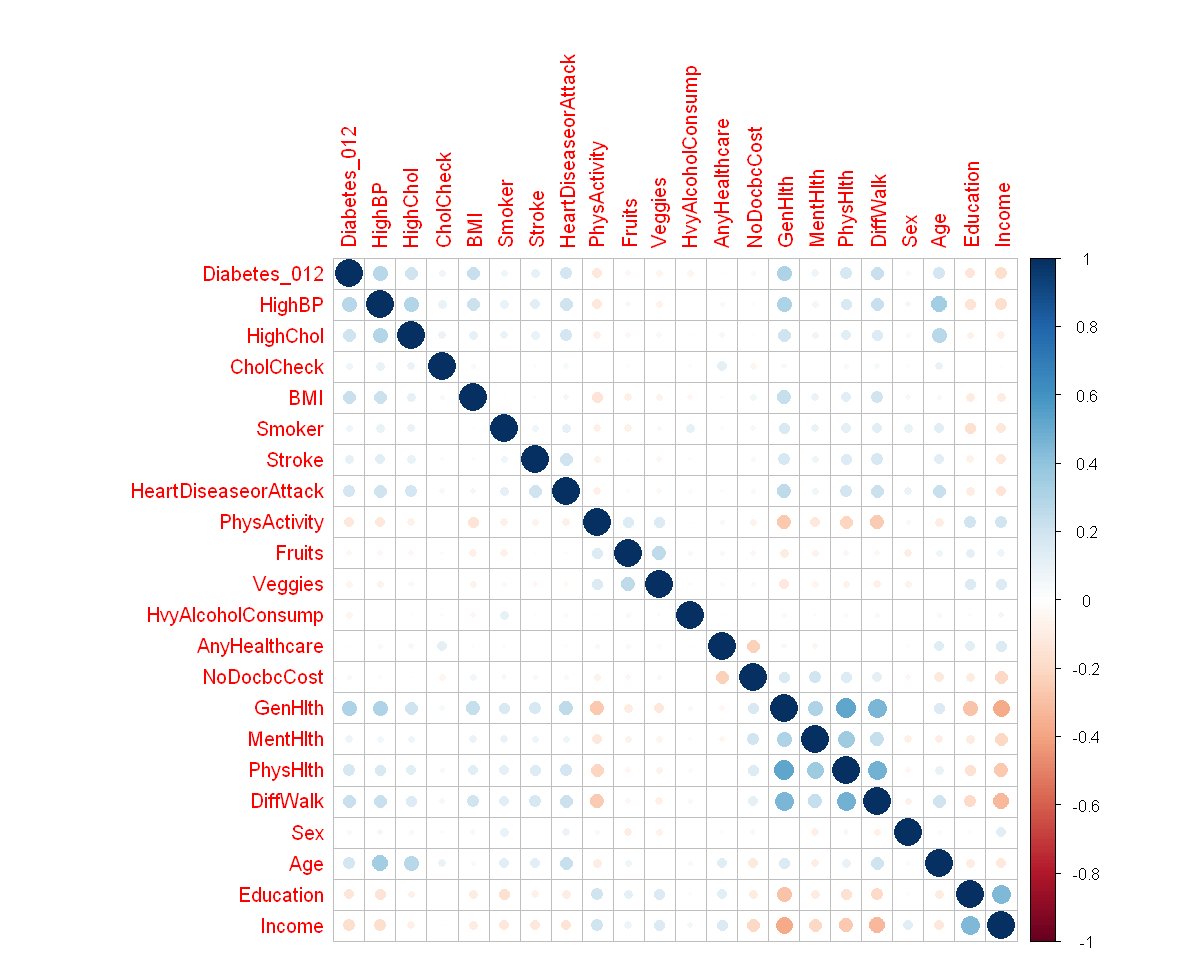

In [10]:
correlation <- cor(df, use = 'pairwise.complete.obs')
corrplot(correlation)

Một số biến trong dataset có tương quan mạnh với nhau:
- (GenHlth, PhysHlth), (PhysHlth, DiffWalk), (Education, Income), (GenHlth, DiffWalk), (MenthHlth, PhysHlth): tương quan thuận
- (GenHlth, Income), (DiffWalk, Income): tương quan nghịch

Bên cạnh đó thì các biến sau cũng có tương quan với khá nhiều biến khác: GenHlth, PhysHlth, DiffWalk, Income, 

**Tương quan của các biến với biến Diabetes_012:**

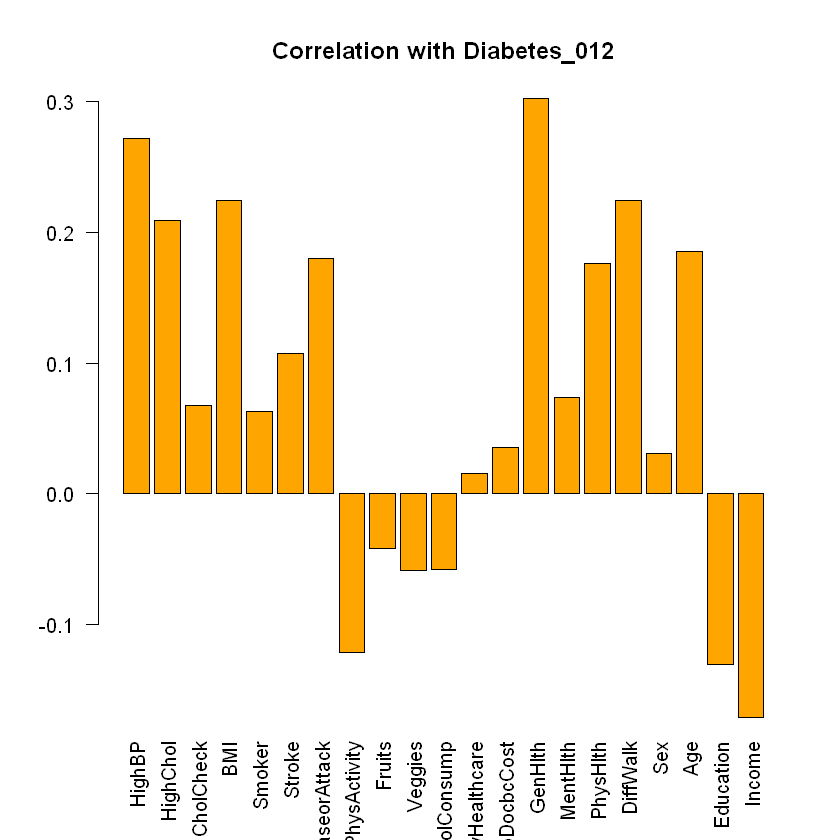

In [5]:
correlation_with_diabetes <- cor(df)[, "Diabetes_012"]
barplot(correlation_with_diabetes[-which(names(correlation_with_diabetes) == "Diabetes_012")], 
        main = "Correlation with Diabetes_012", col = "orange", las = 2)

**Các biến có khả năng tương quan với biến dự đoán:** HighBP, HighChol, BMI, CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, GenHlth, PhysHlth, DiffWalk, Age, Education, Income.       

### Quan hệ của các biến giải thích với biến dự đoán

#### Biến nhị phân

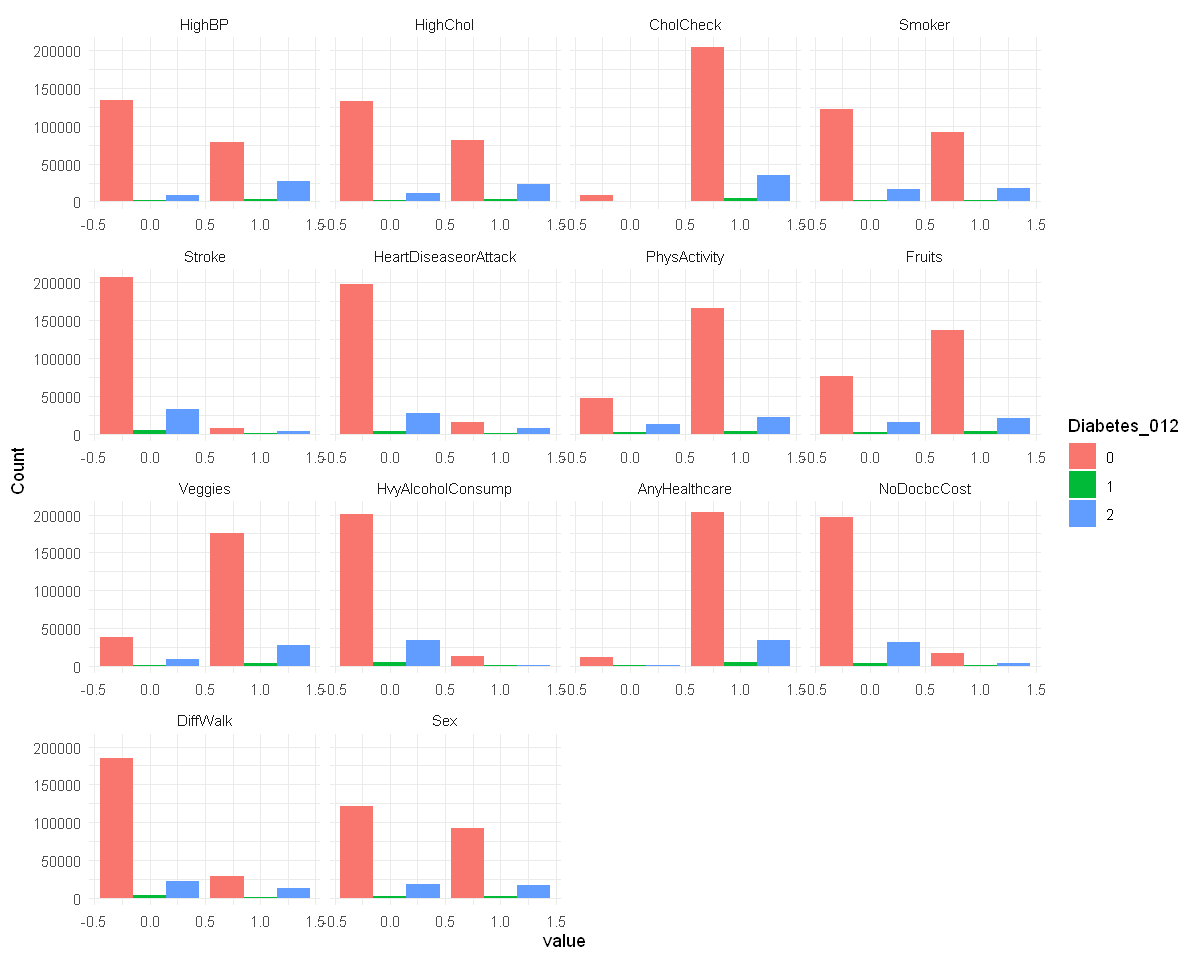

In [7]:
binary_vars <- df %>% select_if(~n_distinct(.) <= 3) %>% mutate(Diabetes_012 = df$Diabetes_012)

options(repr.plot.width=10, repr.plot.height=8)
# Reshape data for plotting
binary_vars_melt <- melt(binary_vars, id.vars = "Diabetes_012")

ggplot(binary_vars_melt, aes(x = value, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  facet_wrap(~variable, scales = 'free_x') + 
  theme_minimal() + 
  labs(y = "Count", fill = "Diabetes_012")

In [13]:
df2 <- df %>% select(-BMI, -MentHlth, -PhysHlth, -GenHlth, -Age, -Education, -Income)

results <- list()

for (col in colnames(df2)) {
  if (col != "Diabetes_012") {
    result <- df2 %>%
      group_by(!!sym(col)) %>%
      count(Diabetes_012) %>%
      mutate(percentage = n / sum(n)) %>%
      select(-n) %>%
      spread(Diabetes_012, percentage, fill = 0) %>%
      ungroup()
    
    result <- result %>%
      mutate(Name = paste0(col, "_", !!sym(col))) %>%
      select(Name, `0`, `1`, `2`) %>%
      rename(`No Diabetes` = `0`, `Pre Diabetes` = `1`, `Diabetes` = `2`)
    
    results[[col]] <- result
  }
}

results_df <- bind_rows(results)
results_df <- results_df %>% select(Name, `No Diabetes`, `Pre Diabetes`, `Diabetes`)
head(results_df)

Name,No Diabetes,Pre Diabetes,Diabetes
<chr>,<dbl>,<dbl>,<dbl>
HighBP_0,0.9277879,0.01186046,0.06035167
HighBP_1,0.7287763,0.02676676,0.24445690
HighChol_0,0.9081656,0.01202007,0.07981436
HighChol_1,0.7531299,0.02672157,0.22014853
CholCheck_0,0.9680042,0.00654699,0.02544879
CholCheck_1,0.8375415,0.01870931,0.14374923


In [14]:
# chọn các biến có khác biệt tỉ lệ trên 10% 
for (i in seq(1, nrow(results_df), by = 2)) {
  if (abs(results_df[i, 'No Diabetes'] - results_df[i + 1, 'No Diabetes']) > 0.1) {
    print(substr(results_df[i, 'Name'], 1, nchar(as.character(results_df[i, 'Name'])) - 2))
  }
}

[1] "HighBP"
[1] "HighChol"
[1] "CholCheck"
[1] "Stroke"
[1] "HeartDiseaseorAttack"
[1] "PhysActivity"
[1] "DiffWalk"


=> các biến trên có thể có ảnh hưởng **lớn** đến khả năng mắc bệnh tiểu đường.

#### Các biến định tính còn lại
 GenHlth, Age, Education, Income

In [57]:
df %>% group_by(GenHlth) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

GenHlth,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.9679242,0.006909645,0.02516612
2,0.9147434,0.013627587,0.07162902
3,0.7992624,0.022843244,0.17789440
4,0.6574279,0.032467532,0.31010453
5,0.5920040,0.029053886,0.37894214


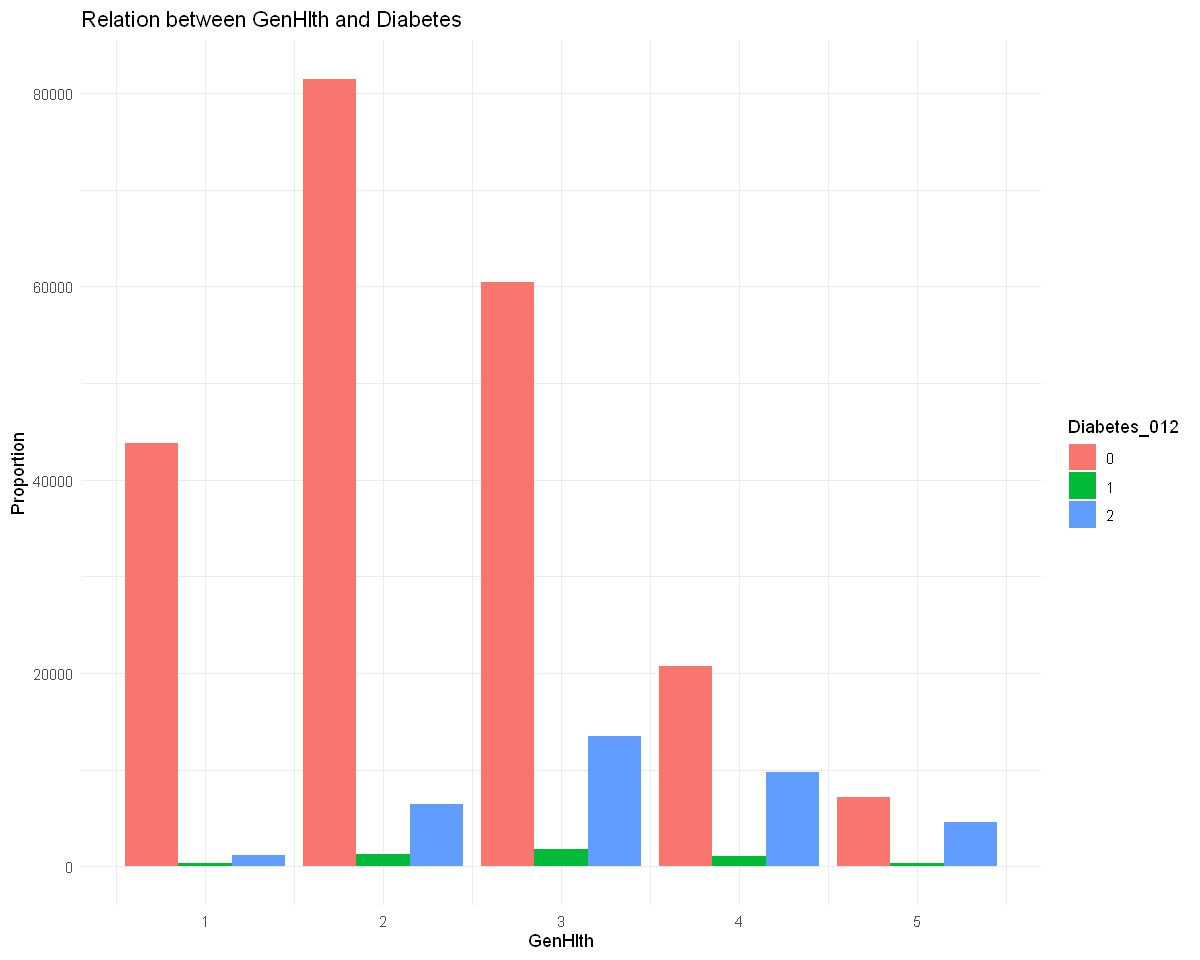

In [42]:
categorical_vars <- df %>% select(Diabetes_012, GenHlth, Age, Education, Income)

ggplot(categorical_vars, aes(x = GenHlth, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between GenHlth and Diabetes")


Các trường hợp có sức khỏe Excellent (nhãn 1) và Very Good (nhãn 2) thì ít khả năng mắc bệnh tiểu đường. Ngược lại thì với nhãn 4 và 5 thì xác suất mắc bệnh tiểu đường khá cao. 

In [56]:
df %>% group_by(Age) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

Age,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.9826316,0.003684211,0.01368421
2,0.9744670,0.007107133,0.01842590
3,0.9652971,0.006473074,0.02822979
4,0.9444404,0.010272734,0.04528684
5,0.9248623,0.010088507,0.06504920
6,0.8963621,0.015742469,0.08789545
7,0.8667629,0.015885080,0.11735198
8,0.8438960,0.017838609,0.13826544
9,0.8064312,0.021116592,0.17245217


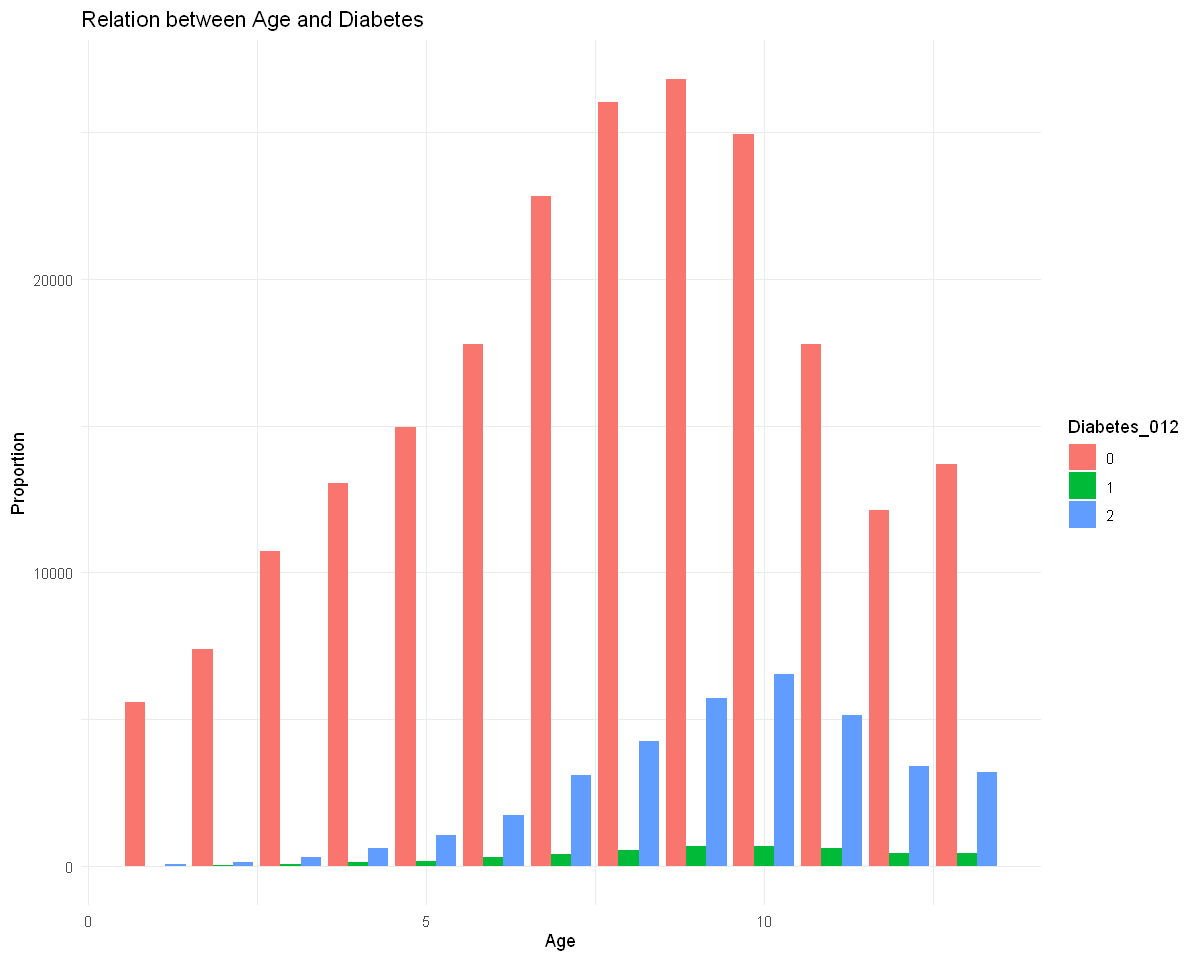

In [43]:
ggplot(categorical_vars, aes(x = Age, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between Age and Diabetes")


Dữ liệu quan sát được đa số quan trắc nằm trong nhóm tuổi từ 6-10. Khả năng mắc bệnh tiểu đường trong nhóm này tăng dần theo độ tuổi. Khả năng mắc bệnh ở nhóm 11 và 12 không tăng và giảm ở nhóm 13. 

In [55]:
df %>% group_by(Education) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

Education,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.7183908,0.01149425,0.27011494
2,0.6675736,0.03982191,0.29260450
3,0.7246254,0.03312935,0.24224520
4,0.8021355,0.02151394,0.17635060
5,0.8328279,0.01906737,0.14810471
6,0.8893920,0.01370603,0.09690193


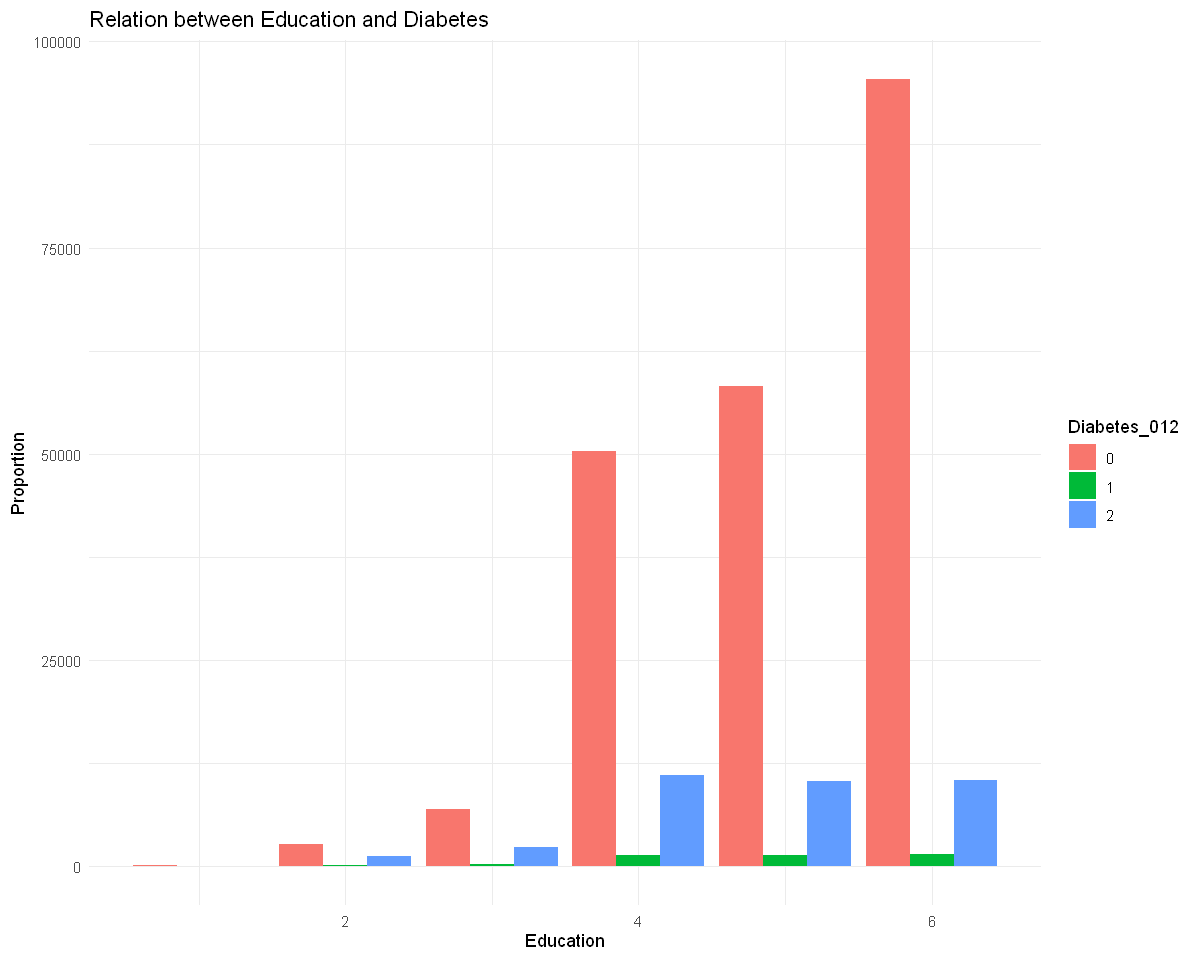

In [44]:
ggplot(categorical_vars, aes(x = Education, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between Education and Diabetes")


Khả năng mắc bệnh tiểu đường có xu hướng giảm dần từ nhóm có trình độ học vấn thấp đến trình độ học vấn cao. 

(Số lượng người được khảo sát có trình độ học vấn từ 1->3 ở đây đang rất ít só với các nhóm còn lại nên có thể chưa phản ánh chính xác)

In [ ]:
df %>% group_by(Income) %>%
  count(Diabetes_012) %>%
  mutate(percentage = n / sum(n)) %>%
  select(-n) %>%
  spread(Diabetes_012, percentage, fill = 0)

Income,0,1,2
<dbl>,<dbl>,<dbl>,<dbl>
1,0.7251045,0.03200489,0.24289063
2,0.7078842,0.03021302,0.26190274
3,0.7505940,0.02632237,0.22308366
4,0.7758629,0.02279613,0.20134095
5,0.8033072,0.02267898,0.17401383
6,0.8344118,0.02051001,0.14507815
7,0.8611722,0.01700641,0.12182142
8,0.9092106,0.01118548,0.07960392


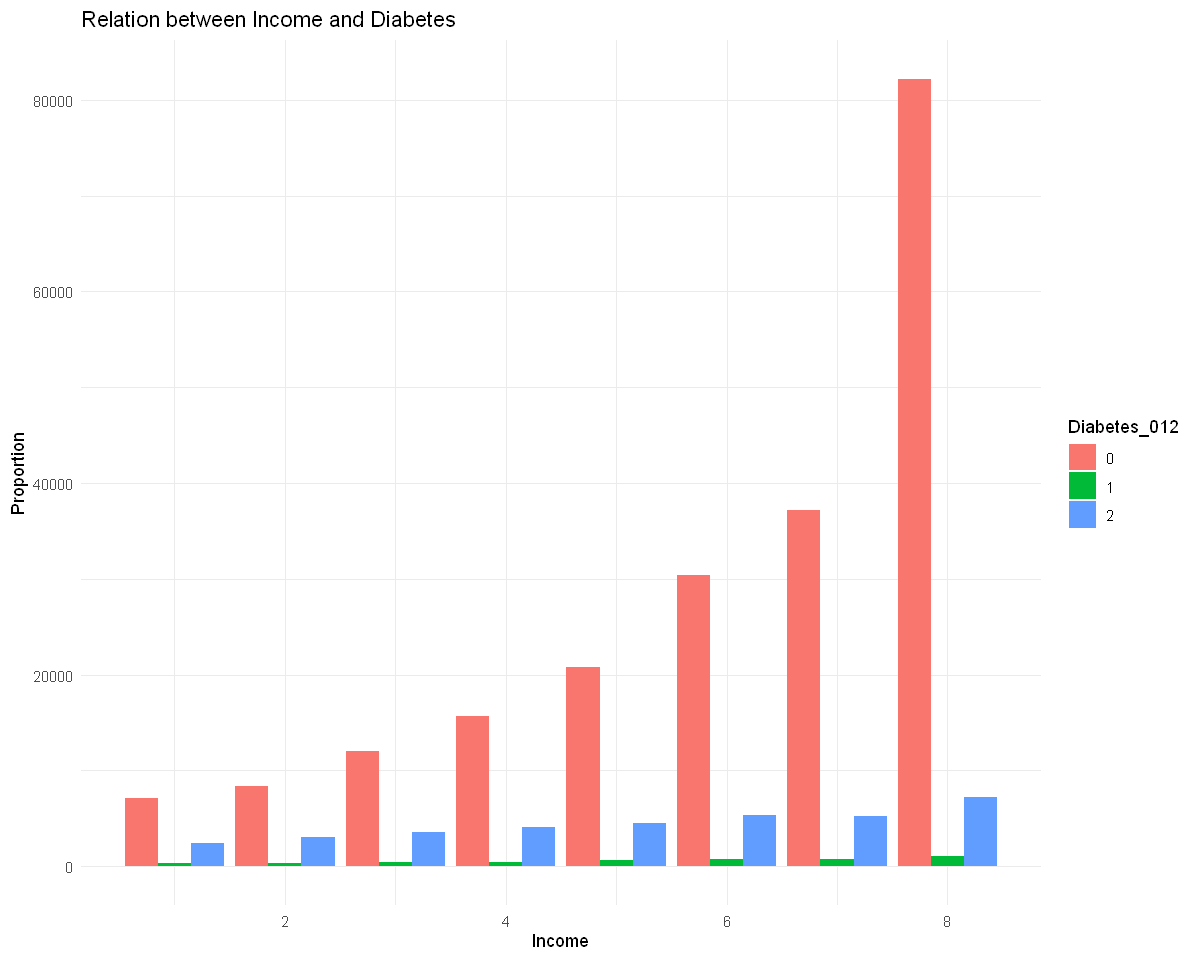

In [45]:
ggplot(categorical_vars, aes(x = Income, fill = factor(Diabetes_012))) + 
  geom_bar(position = "dodge") + 
  theme_minimal() + 
  labs(y = "Proportion", fill = "Diabetes_012", title = "Relation between Income and Diabetes")

Khả năng bị bệnh tiểu đường cũng có xu hướng giảm dần từ nhóm có thu nhập thấp đến nhóm có thu nhập cao.

Do đã quan sát thấy Education và Income có tương quan thuận, nên xu hướng cho 2 biến này lên biến phụ thuộc giống nhau. 

#### Biến định lượng
BMI, MentHlth, PhysHlth

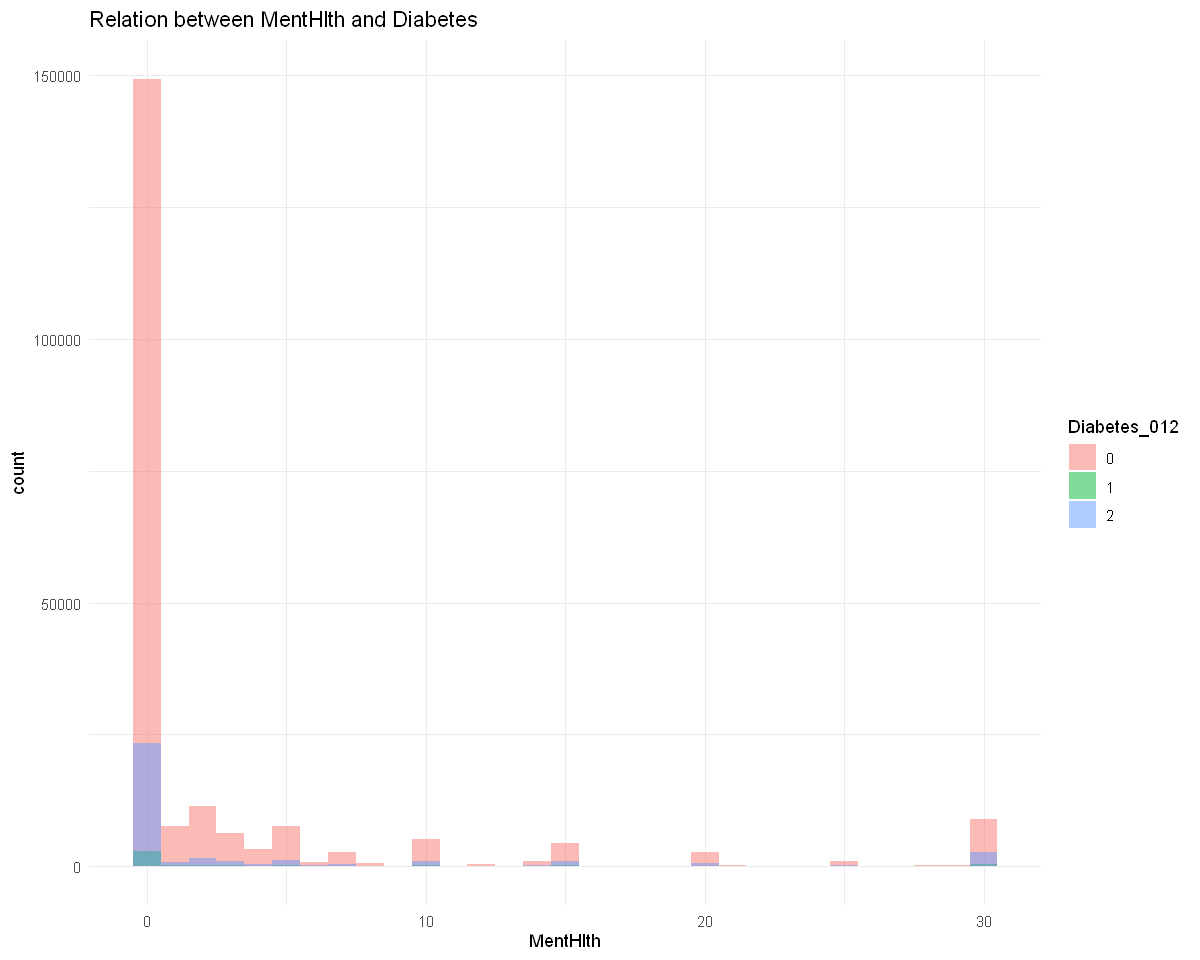

In [46]:
ggplot(df, aes(x = MentHlth, fill = factor(Diabetes_012))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 31) + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between MentHlth and Diabetes")


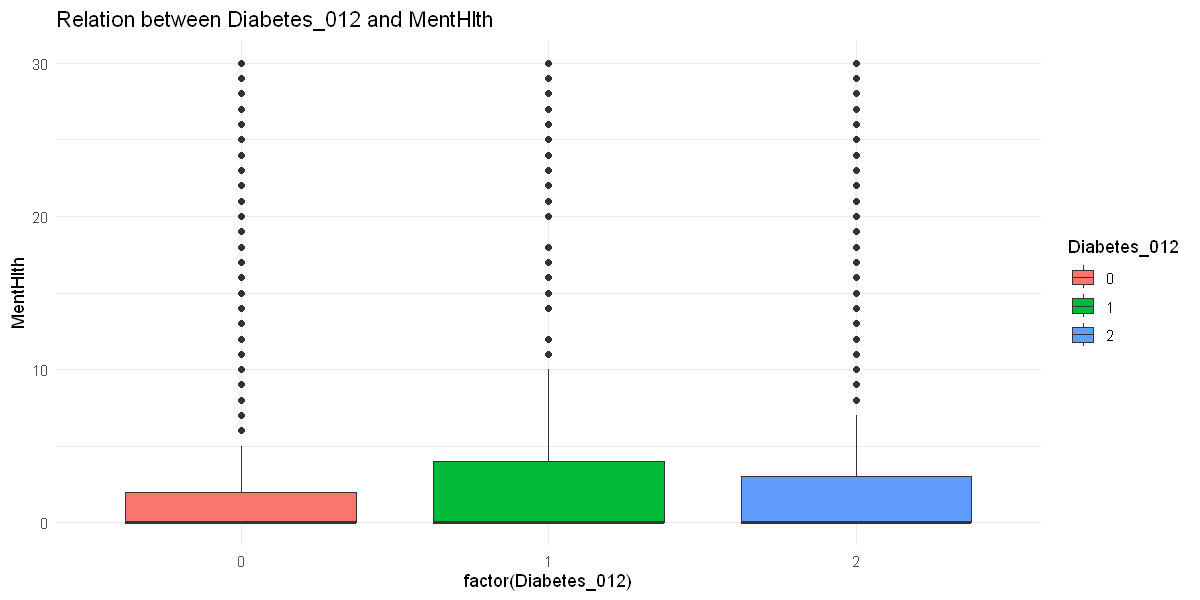

In [12]:
ggplot(df, aes(x = factor(Diabetes_012), y = MentHlth, fill = factor(Diabetes_012))) + 
  geom_boxplot() +
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and MentHlth")

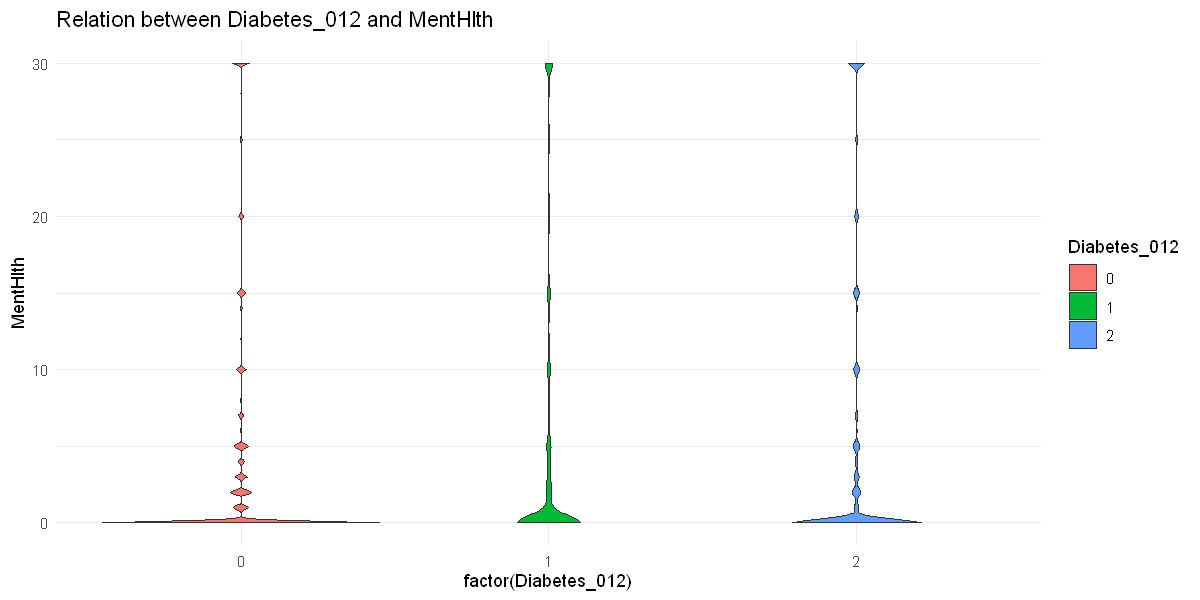

In [11]:
ggplot(df, aes(x = factor(Diabetes_012), y = MentHlth, fill = factor(Diabetes_012))) + 
  geom_violin() +
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and MentHlth")

phân phối cho MentHlth khá đều trong các trường hợp về bệnh tiểu đường.         
Đa số người không bị tiểu đường thì gặp vấn đề sức khỏe tinh thần kéo dài dưới 5 ngày.          
Những người không gặp vấn đề tâm lí (MentHlth=0) vẫn có khả năng mắc tiểu đường hoặc không, giá trị trung bình cho cả 3 boxplot đều là 0.  

Với biểu đồ violin thì quan sát thấy số người bị tiểu đường có vấn đề sức khỏe tinh thần trong khoảng 30 ngày liên tục nhiều hơn so với nhóm không bị tiểu đường. 

In [1]:
ggplot(df, aes(x = PhysHlth, fill = factor(Diabetes_012))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 31) + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between PhysHlth and Diabetes")


ERROR: Error in ggplot(df, aes(x = PhysHlth, fill = factor(Diabetes_012))): could not find function "ggplot"


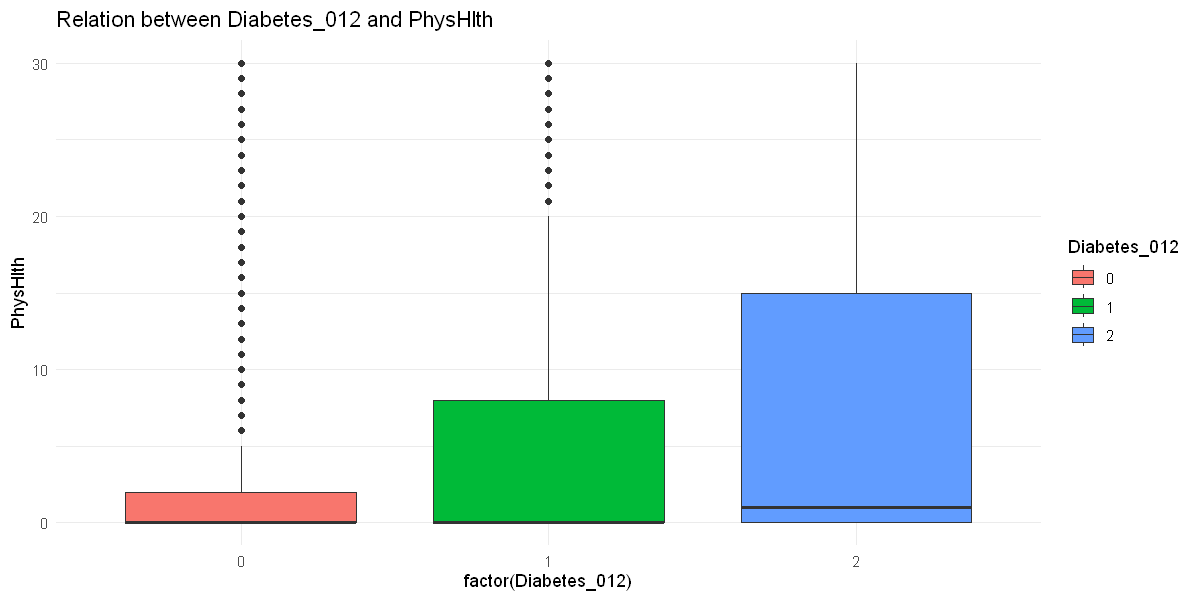

In [9]:
ggplot(df, aes(x = factor(Diabetes_012), y = PhysHlth, fill = factor(Diabetes_012))) + 
  geom_boxplot() + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and PhysHlth")

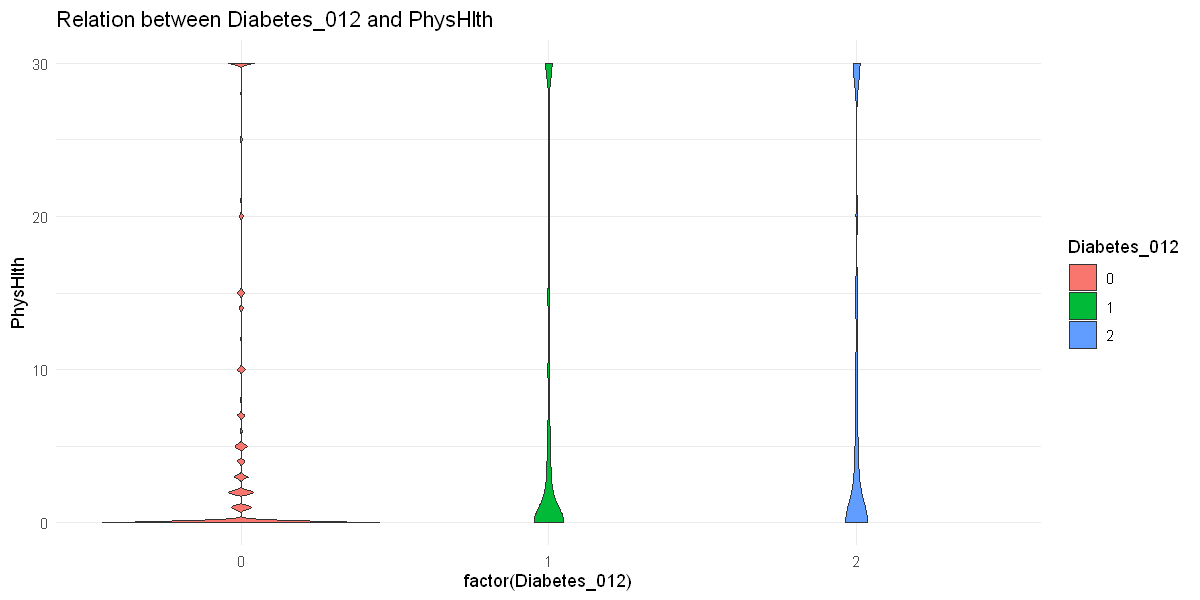

In [10]:
ggplot(df, aes(x = factor(Diabetes_012), y = PhysHlth, fill = factor(Diabetes_012))) + 
  geom_violin() + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and PhysHlth")

phân phối cho PhysHlth đã cho sự chênh lệch nhất định.      
Đa số người không bị tiểu đường cũng gặp vấn đề sức khỏe thể chất < 5 ngày.         
Phân phối của nhóm người tiền tiểu đường trải dài hơn gần như gấp đôi so với MentHlth.          
Phân phối của nhóm người bị tiểu đường trải dài hết vùng giá trị của PhysHlth và không có outliers, trung bình cho nhóm này cũng đã bị kéo lên không còn ở 0. 

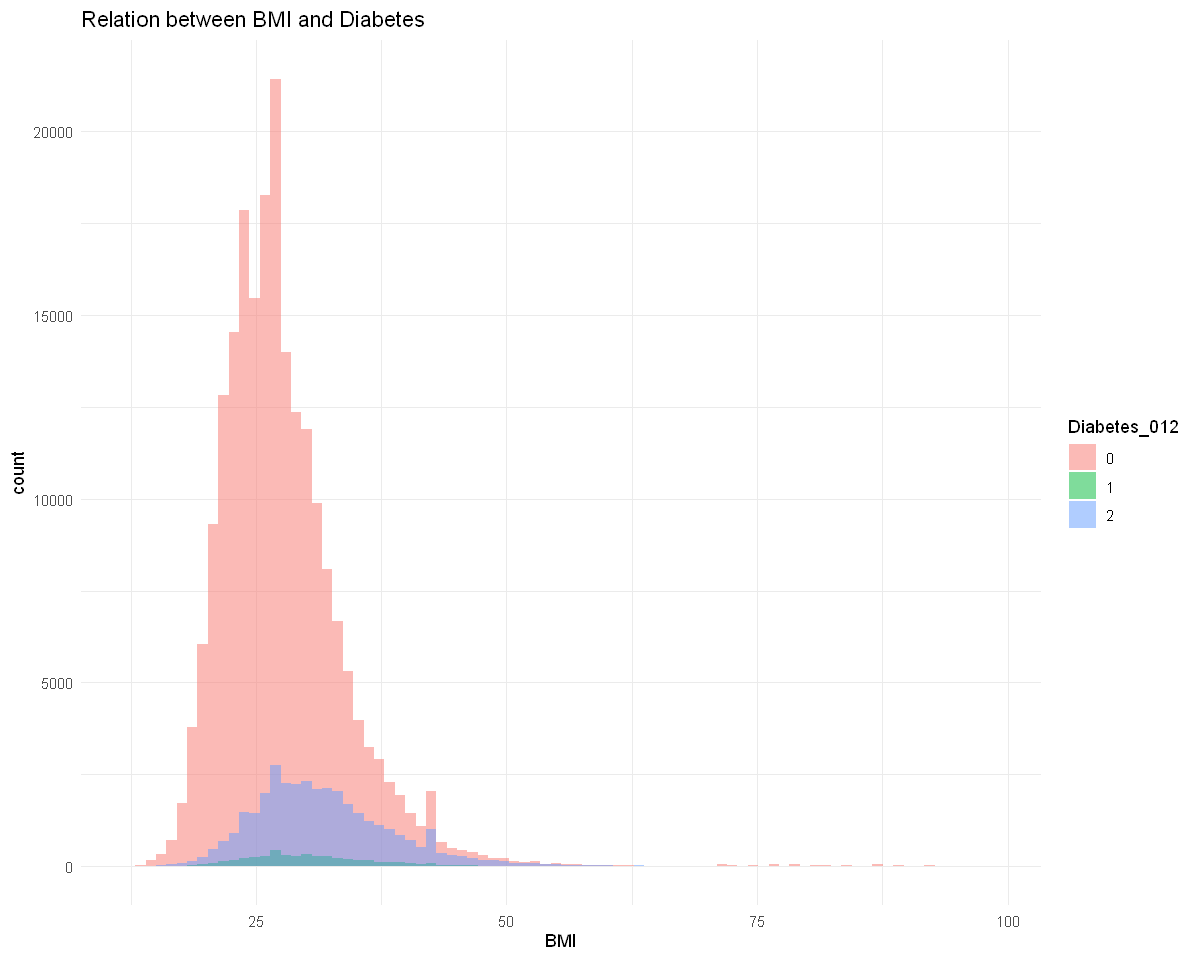

In [48]:
ggplot(df, aes(x = BMI, fill = factor(Diabetes_012))) + 
  geom_histogram(position = "identity", alpha = 0.5, bins = 84) + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between BMI and Diabetes")

In [31]:
df %>% group_by(Diabetes_012) %>%
  summarise(
    mean = mean(BMI, na.rm = TRUE), 
    sd = sd(BMI, na.rm = TRUE),
    Q1 = quantile(BMI, 0.25, na.rm = TRUE),
    Q3 = quantile(BMI, 0.75, na.rm = TRUE))

Diabetes_012,mean,sd,Q1,Q3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,27.74252,6.260993,24,30
1,30.72447,6.964898,26,34
2,31.94401,7.363401,27,35


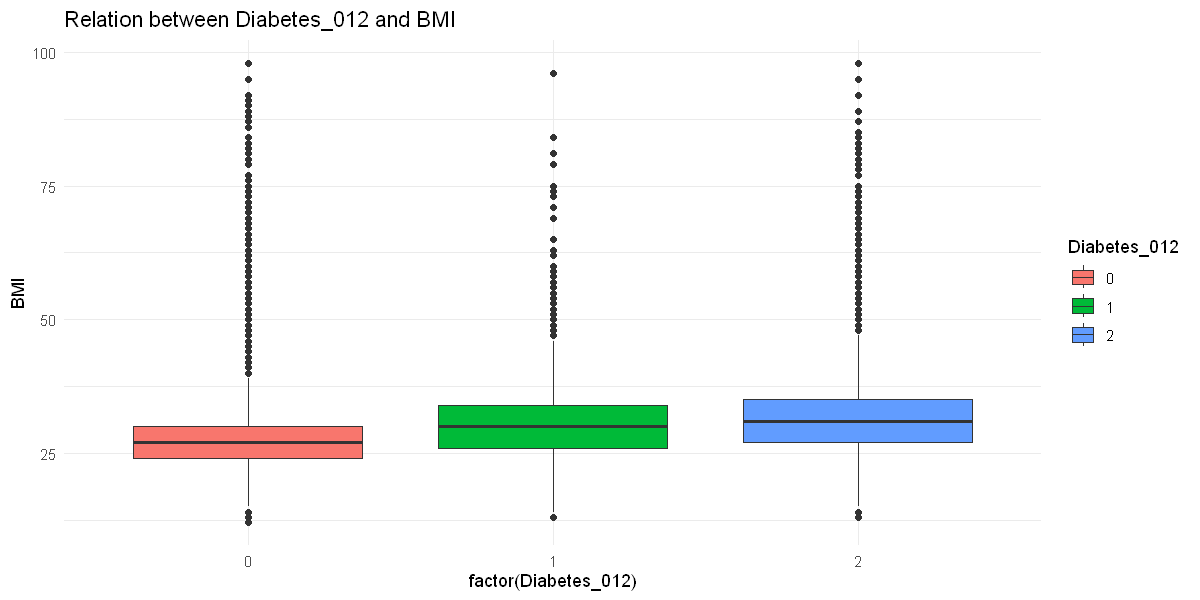

In [67]:
ggplot(df, aes(x = factor(Diabetes_012), y = BMI, fill = factor(Diabetes_012))) + 
  geom_boxplot() + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and BMI")

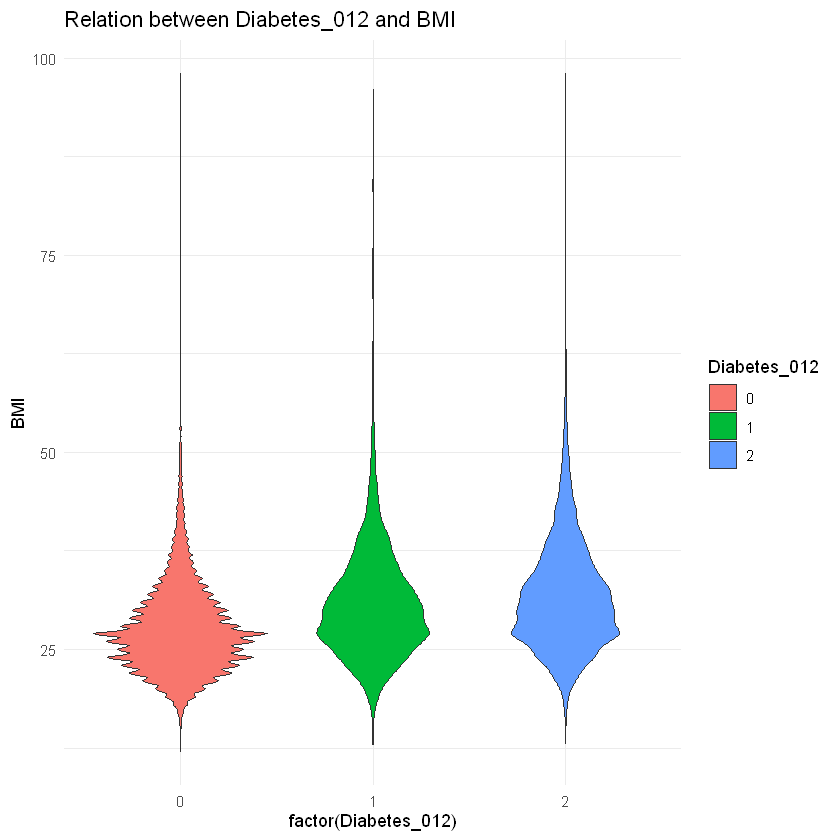

In [11]:
ggplot(df, aes(x = factor(Diabetes_012), y = BMI, fill = factor(Diabetes_012))) + 
  geom_violin() + 
  theme_minimal() + 
  labs(fill = "Diabetes_012", title = "Relation between Diabetes_012 and BMI")

Những người bị tiền tiểu đường/ tiểu đường có trung bình BMI cao hơn những người không bị tiểu đường. 

đa số người bị tiểu đường hoặc tiền tiểu đường nằm trong khoảng BMI từ [26,35] 

### Quan hệ tương tác của các biến giải thích với biến dự đoán

Kiểm tra các biến có tương quan mạnh với nhau:
- (GenHlth, PhysHlth), (PhysHlth, DiffWalk), (Education, Income), (GenHlth, DiffWalk), (MenthHlth, PhysHlth): tương quan thuận
- (GenHlth, Income), (DiffWalk, Income): tương quan nghịch

#### Định tính với định tính

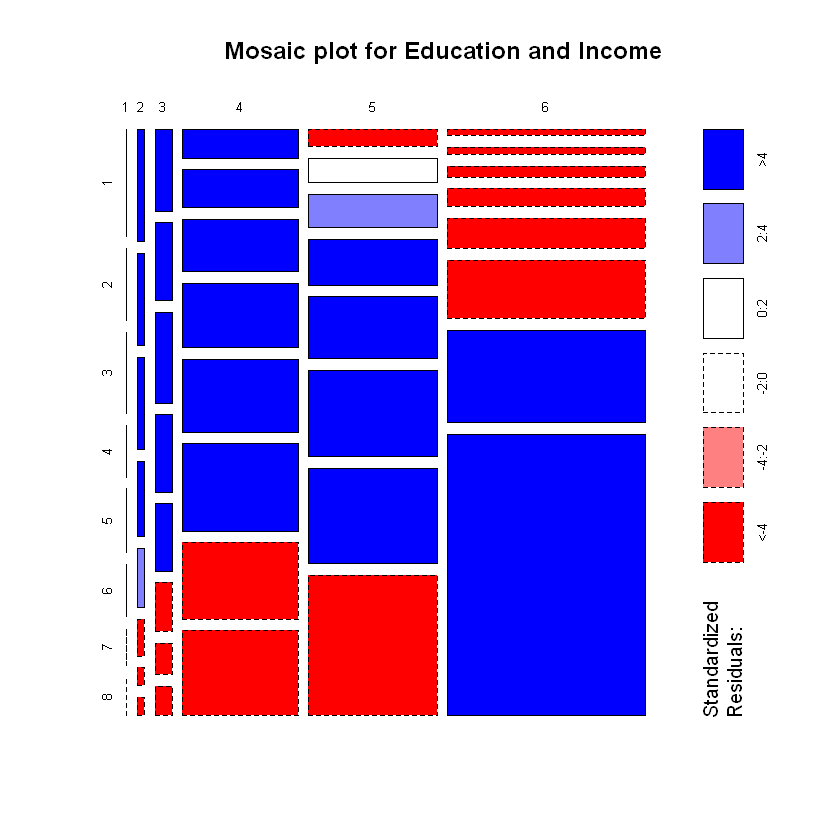

In [ ]:
par(bg = 'white')
mosaicplot(table(df$Education, df$Income), main = "Mosaic plot for Education and Income", color = TRUE, shade = TRUE)

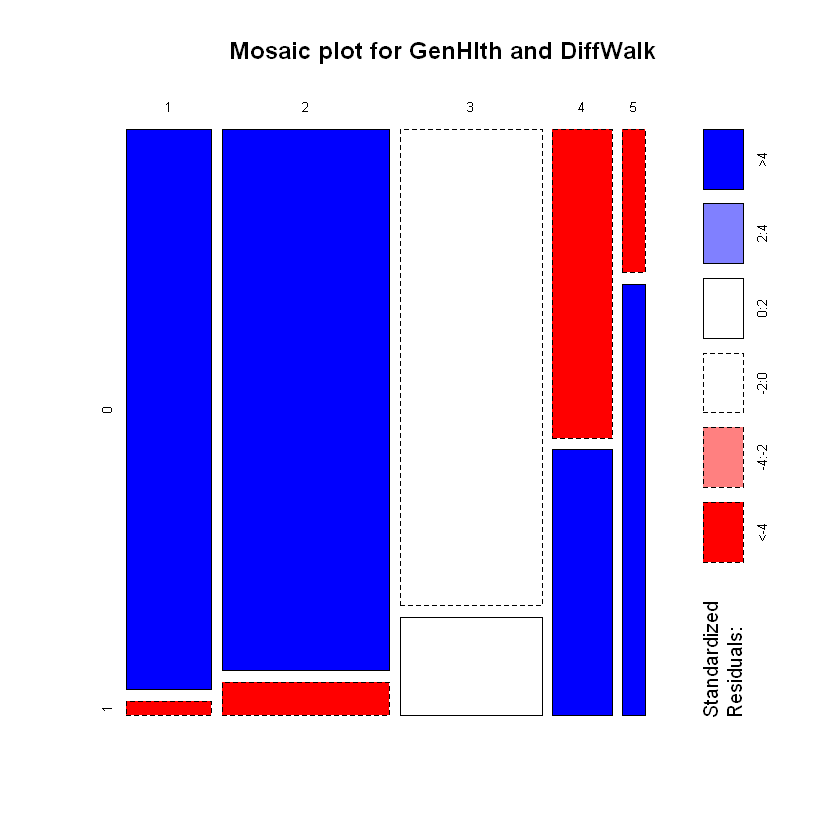

In [10]:
par(bg = 'white')
mosaicplot(table(df$GenHlth, df$DiffWalk), main = "Mosaic plot for GenHlth and DiffWalk", color = TRUE, shade = TRUE)

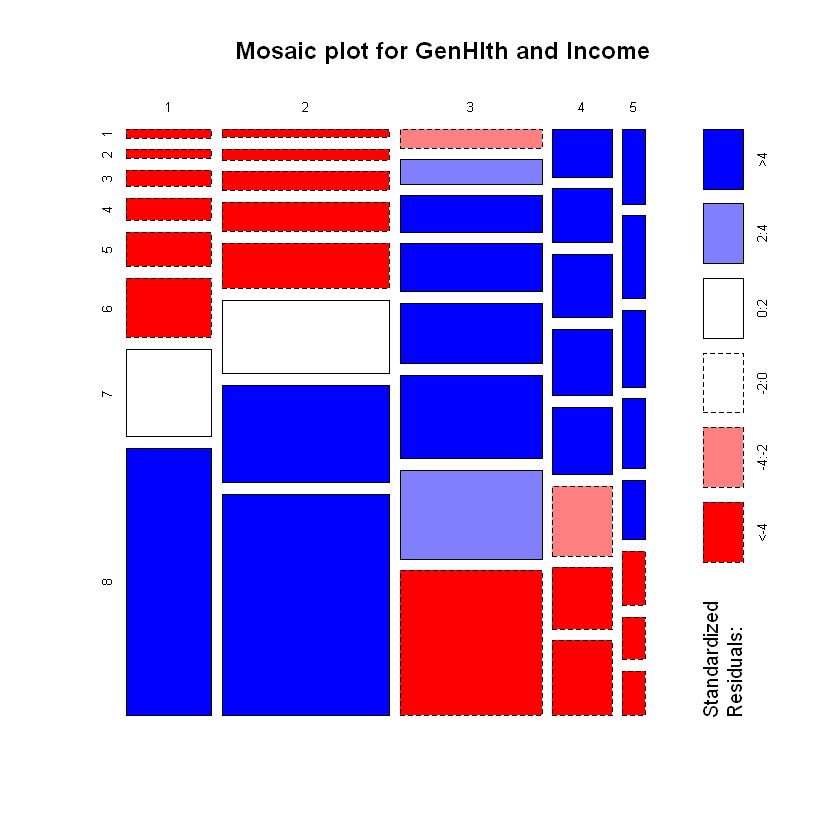

In [6]:
par(bg = 'white')
mosaicplot(table(df$GenHlth, df$Income), main = "Mosaic plot for GenHlth and Income", color = TRUE, shade = TRUE)

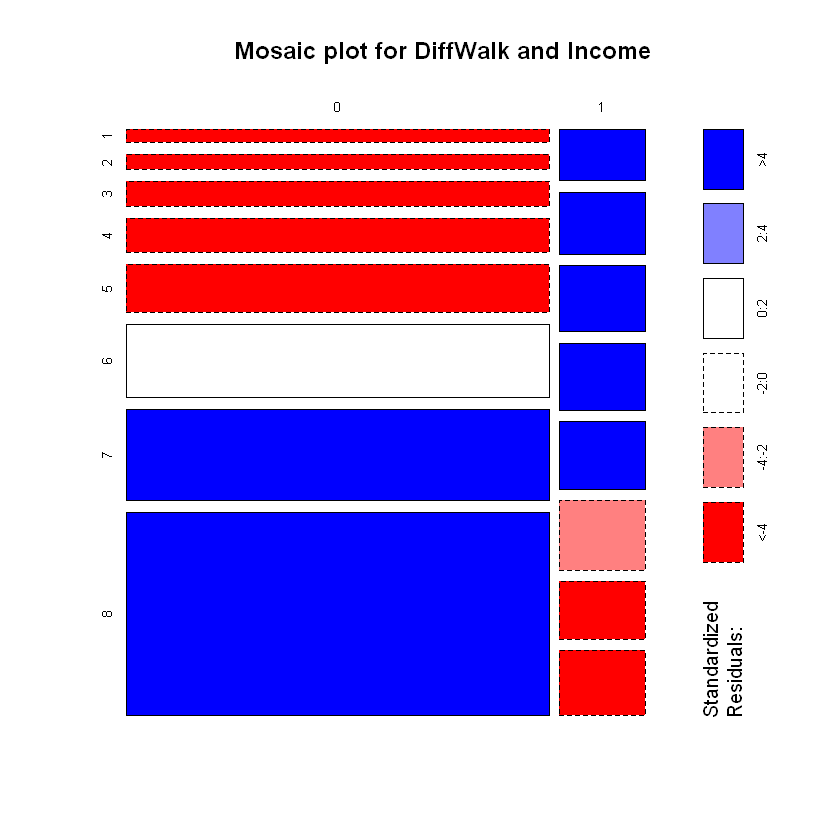

In [7]:
par(bg = 'white')
mosaicplot(table(df$DiffWalk, df$Income), main = "Mosaic plot for DiffWalk and Income", color = TRUE, shade = TRUE)

các ô màu đậm xuất hiện nhiều -> giá trị thực tế khác biệt với giá trị kỳ vọng -> có tương quan giữa 2 biến 

=> Các biểu đồ trên đều cho thấy có sự tương quan giữa 2 biến được xét

#### Định tính với định lượng

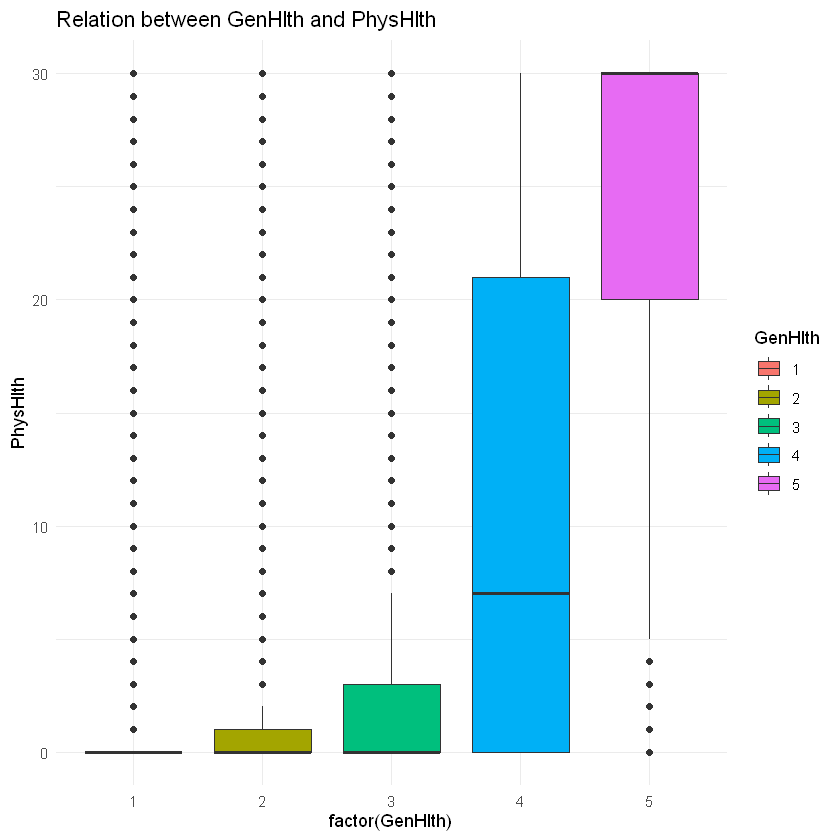

In [8]:
# ve boxplot cho PhysHlth voi GenHlth
ggplot(df, aes(x = factor(GenHlth), y = PhysHlth, fill = factor(GenHlth))) + 
  geom_boxplot() + 
  theme_minimal() + 
  labs(fill = "GenHlth", title = "Relation between GenHlth and PhysHlth")

=> Phần lớn người có GenHlth đạt mức 1 thì không gặp vấn đề sức khỏe thể chất, GenHlth ở các mức tệ hơn thì có gặp vấn đề sức khỏe thể chất kéo dài, đặc biệt là GenHlth ở mức xấu nhất thì phần lớn mọi người gặp vấn đề thể chất kéo dài suốt 30 ngày (trung bình của boxplot ở 30). 

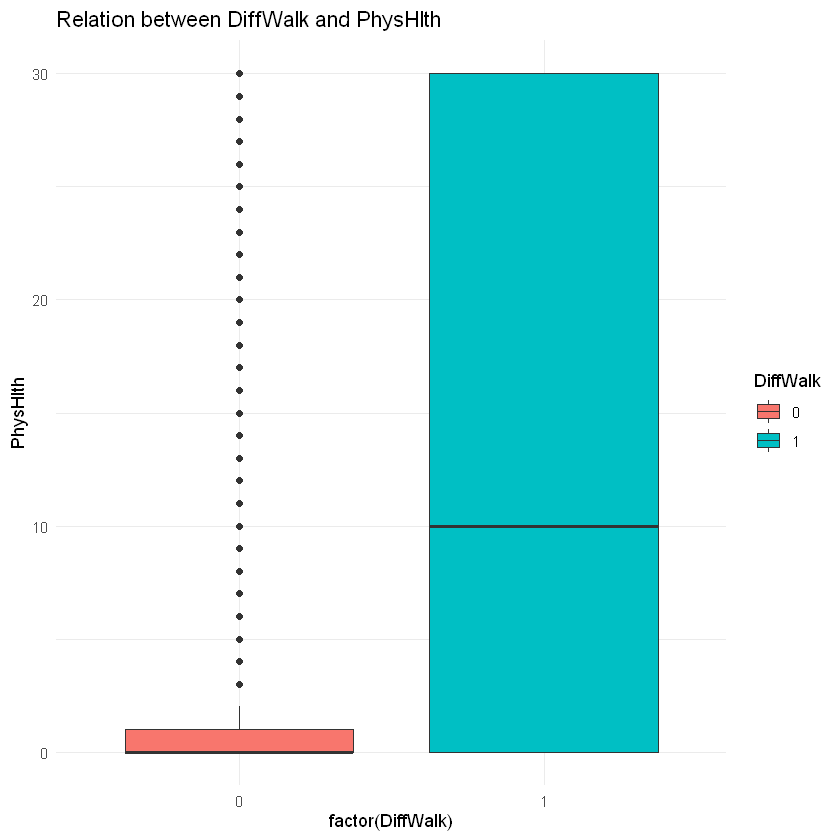

In [9]:
# ve boxplot cho PhysHlth voi DiffWalk
ggplot(df, aes(x = factor(DiffWalk), y = PhysHlth, fill = factor(DiffWalk))) + 
  geom_boxplot() + 
  theme_minimal() + 
  labs(fill = "DiffWalk", title = "Relation between DiffWalk and PhysHlth")

=> Những người có vấn đề với việc đi lại cũng sẽ gặp vấn đề về thể chất. 

#### Định lượng với định lượng

`geom_smooth()` using formula = 'y ~ x'


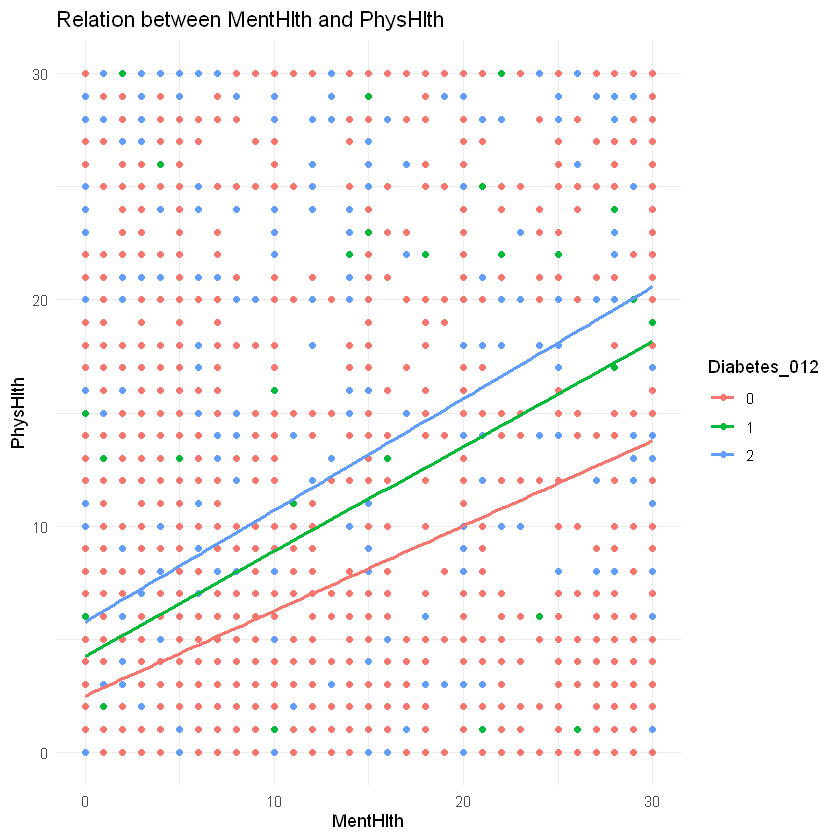

In [10]:
ggplot(df, aes(x = MentHlth, y = PhysHlth, color = factor(Diabetes_012))) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE) + 
  theme_minimal() + 
  labs(color = "Diabetes_012", title = "Relation between MentHlth and PhysHlth")

### Summary

1 số biến có tương quan với nhau => có thể dẫn đến đa cộng tuyến => có thể ảnh hưởng đến logistic regression        

**Hypothesis Testing:** Các loại kiểm định có thể áp dụng với bộ dữ liệu:            
Kiểm định **ANOVA/ Kruskal-Wallis** giữa biến định lượng và định tính/ định lượng.

Kiểm định **Chi-square** giữa các biến định tính.

**Preprocessing:**       
Dữ liệu về số lượng người mắc bệnh tiểu đường và không mắc bệnh bị mất cân bằng nặng => xử lí imbalanced data.         
Các biến định lượng có chứa outliers => có thể dùng log transform/ robust scaling hoặc chia lại nhãn. 
- có thể chia nhãn dữ liệu lại: **Education**.
- có thể dùng Robust Scaling cho: **BMI, MentHlth và PhysHlth**.

*Không loại bỏ outliers được vì outliers của BMI có ý nghĩa trong dự đoán tiểu đường, outliers của MentHlth và PhysHlth thì > 10%.*

**Mục tiêu:** Dự đoán/Phân loại 1 người vào 1 trong 3 class: tiểu đường, tiền tiểu đường, không bị bệnh tiểu đường.            
Biến dự đoán: Diabetes_012.             
*Do dữ liệu mất cân bằng nên ưu tiên dự đoán người có khả năng tiền tiểu đường hoặc tiểu đường và chấp nhận các trường hợp dương tính giả.* 